# Assgn 09  

## Face Swap  

Load a image (You can choose another image)  
- fill the blank area with opencv python codes and
- get the result images as shown below

※  You can use other images but do the same image processing and get the same style of the answer image.  

filename and type : yourname_assgn_09.pdf  
Due Date : 20 Nov 0900 a.m. (Monday 0900 a.m. 1 day before the class)   

### 1. Make Face Landmark

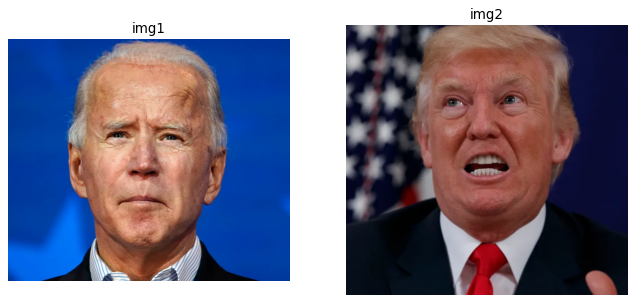

In [30]:
import sys
import numpy as np
import cv2
import dlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

biden = "./images/practice_img/biden.png"
trump = "./images/practice_img/trump.png"

img1 = cv2.imread(biden)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(trump)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('img1'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('img2'),plt.axis('off')
plt.show()

In [31]:
detector = dlib.get_frontal_face_detector()
predictor_68 = dlib.shape_predictor("./cv_data/shape_predictor_68_face_landmarks.dat")
predictor_81 = dlib.shape_predictor("./cv_data/shape_predictor_81_face_landmarks.dat")

## Image 1

In [34]:
print(biden[:-4] + "68.txt")

./images/practice_img/biden68.txt


In [35]:
faces_68 = detector(img1_gray)
with open(biden[:-4] + "68.txt", "w") as f:
    for face in faces_68:
        landmarks = predictor_68(img1_gray, face)
        landmarks_points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))
    #     return landmarks_points
#         print(landmarks_points)
            print(x,y, file=f)

faces_81 = detector(img1_gray)
with open(biden[:-4] + "81.txt", "w") as f:
    for face in faces_81:
        landmarks = predictor_81(img1_gray, face)
        landmarks_points = []
        for n in range(0, 81):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))
    #     return landmarks_points
#         print(landmarks_points)
            print(x,y, file=f)

## Image 2

In [36]:
faces_68 = detector(img2_gray)
with open(trump[:-4] + "68.txt", "w") as f:
    for face in faces_68:
        landmarks = predictor_68(img2_gray, face)
        landmarks_points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))
            print(x,y, file=f)

faces_81 = detector(img2_gray)
with open(trump[:-4] + "81.txt", "w") as f:
    for face in faces_81:
        landmarks = predictor_81(img2_gray, face)
        landmarks_points = []
        for n in range(0, 81):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))
            print(x,y, file=f)

In [37]:
import numpy as np

def drawPoints(image, faceLandmarks, startpoint, endpoint):
    points = []
    for i in range(startpoint, endpoint+1):
        point = (faceLandmarks[i][0], faceLandmarks[i][1])
        points.append(point)

    for i, p in enumerate(points):
        cv2.circle(image, p, 4, (0, 255, 0), -1)
        cv2.putText(image, str(i), (p[0], p[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

def facePoints68(image, faceLandmarks):
    assert(len(faceLandmarks) == 68)
    drawPoints(image, faceLandmarks, 0, 67)
#     drawPoints(image, faceLandmarks, 0, 16)           # Jaw line
#     drawPoints(image, faceLandmarks, 17, 21)          # Left eyebrow
#     drawPoints(image, faceLandmarks, 22, 26)          # Right eyebrow
#     drawPoints(image, faceLandmarks, 27, 30)          # Nose bridge
#     drawPoints(image, faceLandmarks, 30, 35)    # Lower nose
#     drawPoints(image, faceLandmarks, 36, 41)    # Left eye
#     drawPoints(image, faceLandmarks, 42, 47)    # Right Eye
#     drawPoints(image, faceLandmarks, 48, 59)    # Outer lip
#     drawPoints(image, faceLandmarks, 60, 67)    # Inner lip

def facePoints81(image, faceLandmarks, color=(0, 255, 0), radius=4):
    assert(len(faceLandmarks) == 81)
    for i, p in enumerate(faceLandmarks):
        cv2.circle(image, (p[0], p[1]), radius, color, -1)
        cv2.putText(image, str(i), (p[0], p[1]-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

    
def readPoints(path) :  # Read points from text file
    points = [];
    with open(path) as file:
        for line in file:
            x, y = line.split()
            points.append((int(x), int(y)))
    return points

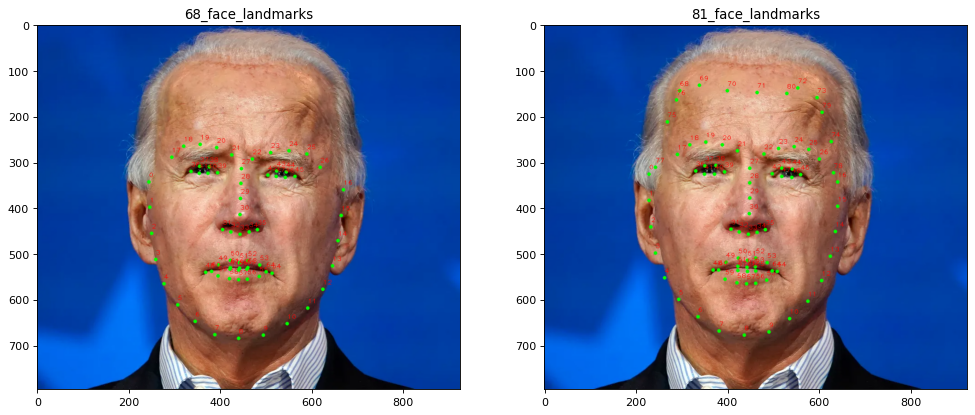

In [38]:
img1 = cv2.imread(biden)
img2 = cv2.imread(biden)

points1 = readPoints(biden[:-4] + "68.txt")
points2 = readPoints(biden[:-4] + "81.txt")   

facePoints68(img1, points1)
facePoints81(img2, points2)

figure(figsize=(15, 10), dpi=80)
plt.subplot(121),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('68_face_landmarks')
plt.subplot(122),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('81_face_landmarks')
plt.show()

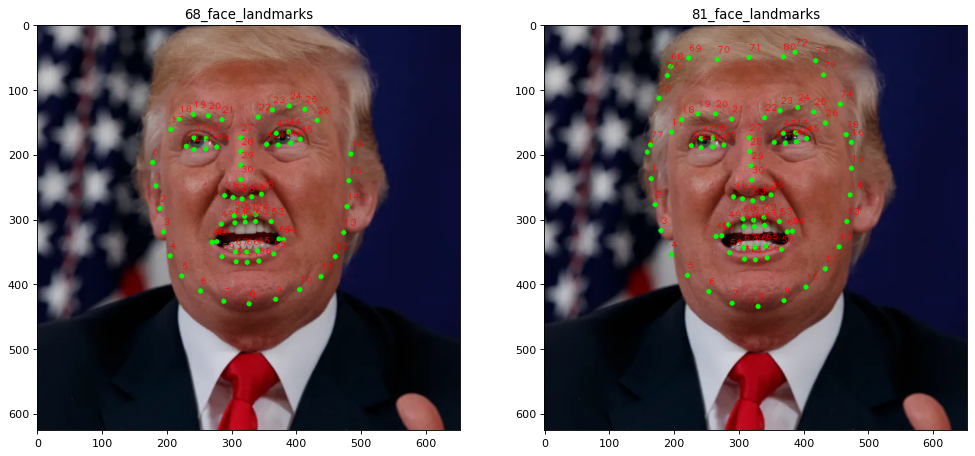

In [39]:
img1 = cv2.imread(trump)
img2 = cv2.imread(trump)

points1 = readPoints(trump[:-4] + "68.txt")
points2 = readPoints(trump[:-4] + "81.txt")   

facePoints68(img1, points1)
facePoints81(img2, points2)

figure(figsize=(15, 10), dpi=80)
plt.subplot(121),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('68_face_landmarks')
plt.subplot(122),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('81_face_landmarks')
plt.show()

## Swap

In [40]:
# Apply affine transform calculated using srcTri and dstTri to src and output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :
    warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri)) # Given a pair of triangles, find the affine transform.
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )
    return dst

def rectContains(rect, point) :   # Check if a point is inside a rectangle
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[0] + rect[2] :
        return False
    elif point[1] > rect[1] + rect[3] :
        return False
    return True

def calculateDelaunayTriangles(rect, points):  # calculate delanauy triangle
    
    subdiv = cv2.Subdiv2D(rect); # create subdiv
    for p in points:   # Insert points into subdiv
        subdiv.insert(p) 
    triangleList = subdiv.getTriangleList();
    delaunayTri = []
    pt = []    
    for t in triangleList:        
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])        
        
        if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
            ind = []
            for j in range(0, 3):    # Get face-points (from 68 face detector) by coordinates
                for k in range(0, len(points)):                    
                    if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)    
            # Three points form a triangle. Triangle array corresponds to the file tri.txt in FaceMorph 
            if len(ind) == 3:                                                
                delaunayTri.append((ind[0], ind[1], ind[2]))
        pt = []        
    return delaunayTri

# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2) :
    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))
    # Offset points by left top corner of the respective rectangles
    t1Rect = [] 
    t2Rect = []
    t2RectInt = []

    for i in range(0, 3):
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))
        t2RectInt.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32) # Get mask by filling triangle
    cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0);
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]  # Apply warpImage to small rectangular patches
    #img2Rect = np.zeros((r2[3], r2[2]), dtype = img1Rect.dtype)
    size = (r2[2], r2[3])
    img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)
    img2Rect = img2Rect * mask
    # Copy triangular region of the rectangular patch to the output image
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( (1.0, 1.0, 1.0) - mask )
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect 

In [43]:
img1 = cv2.imread(biden);
img2 = cv2.imread(trump);
img1Warped = np.copy(img2);    


# Read array of corresponding points
points1 = readPoints(biden[:-4] + "68.txt")
points2 = readPoints(trump[:-4] + "68.txt")    

# Find convex hull
hull1 = []
hull2 = []
hullIndex = cv2.convexHull(np.array(points2), returnPoints = False)

for i in range(0, len(hullIndex)):
    hull1.append(points1[int(hullIndex[i])])
    hull2.append(points2[int(hullIndex[i])])

# Find delanauy traingulation for convex hull points
sizeImg2 = img2.shape    
rect = (0, 0, sizeImg2[1], sizeImg2[0])
dt = calculateDelaunayTriangles(rect, hull2)

if len(dt) == 0:
    quit()

# Apply affine transformation to Delaunay triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []
    #get points for img1, img2 corresponding to the triangles
    for j in range(0, 3):
        t1.append(hull1[dt[i][j]])
        t2.append(hull2[dt[i][j]])
    warpTriangle(img1, img1Warped, t1, t2)

# Calculate Mask
hull8U = []
for i in range(0, len(hull2)):
    hull8U.append((hull2[i][0], hull2[i][1]))
mask = np.zeros(img2.shape, dtype = img2.dtype)  
cv2.fillConvexPoly(mask, np.int32(hull8U), (255, 255, 255))
r = cv2.boundingRect(np.float32([hull2]))    
center = ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))
output68 = cv2.seamlessClone(np.uint8(img1Warped), img2, mask, center, cv2.NORMAL_CLONE)

cv2.imshow("Face Swapped", output68)
cv2.waitKey(0)
cv2.destroyAllWindows()

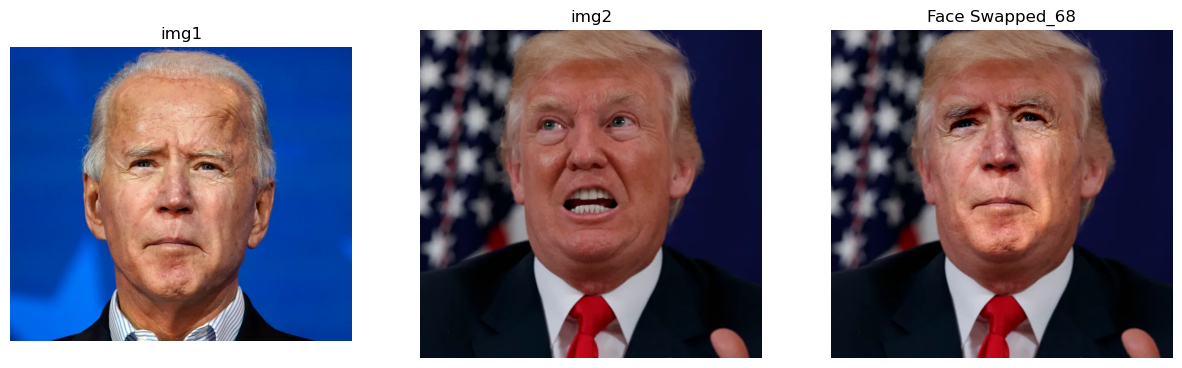

In [44]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('img1'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('img2'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(output68, cv2.COLOR_BGR2RGB)),plt.title('Face Swapped_68'),plt.axis('off')
plt.show()

In [50]:
img1 = cv2.imread(trump);
img2 = cv2.imread(biden);
img1Warped = np.copy(img2);    


# Read array of corresponding points
points1 = readPoints(trump[:-4] + "81.txt")
points2 = readPoints(biden[:-4] + "81.txt")    

# Find convex hull
hull1 = []
hull2 = []
hullIndex = cv2.convexHull(np.array(points2), returnPoints = False)

for i in range(0, len(hullIndex)):
    hull1.append(points1[int(hullIndex[i])])
    hull2.append(points2[int(hullIndex[i])])

# Find delanauy traingulation for convex hull points
sizeImg2 = img2.shape    
rect = (0, 0, sizeImg2[1], sizeImg2[0])
dt = calculateDelaunayTriangles(rect, hull2)

if len(dt) == 0:
    quit()

# Apply affine transformation to Delaunay triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []
    #get points for img1, img2 corresponding to the triangles
    for j in range(0, 3):
        t1.append(hull1[dt[i][j]])
        t2.append(hull2[dt[i][j]])
    warpTriangle(img1, img1Warped, t1, t2)

# Calculate Mask
hull8U = []
for i in range(0, len(hull2)):
    hull8U.append((hull2[i][0], hull2[i][1]))
mask = np.zeros(img2.shape, dtype = img2.dtype)  
cv2.fillConvexPoly(mask, np.int32(hull8U), (255, 255, 255))
r = cv2.boundingRect(np.float32([hull2]))    
center = ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))
output81 = cv2.seamlessClone(np.uint8(img1Warped), img2, mask, center, cv2.NORMAL_CLONE)

cv2.imshow("Face Swapped", output81)
cv2.waitKey(0)
cv2.destroyAllWindows()

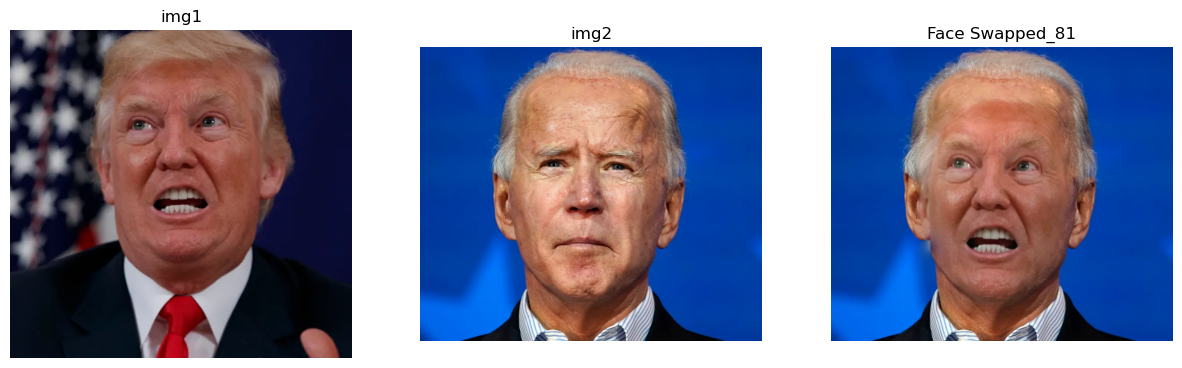

In [51]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('img1'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('img2'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(output81, cv2.COLOR_BGR2RGB)),plt.title('Face Swapped_81'),plt.axis('off')
plt.show()

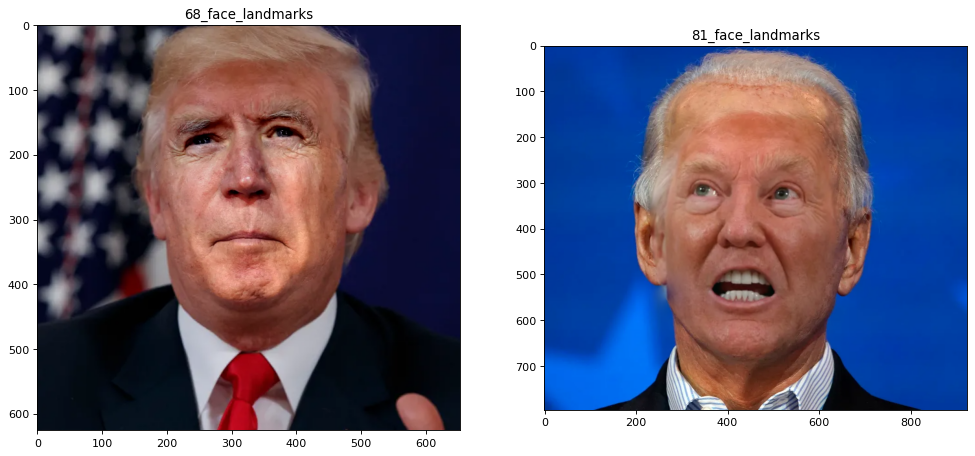

In [52]:
figure(figsize=(15, 10), dpi=80)
plt.subplot(121),plt.imshow(cv2.cvtColor(output68, cv2.COLOR_BGR2RGB)),plt.title('68_face_landmarks')
plt.subplot(122),plt.imshow(cv2.cvtColor(output81, cv2.COLOR_BGR2RGB)),plt.title('81_face_landmarks')
plt.show()